In [ ]:
# multivariate linear regression 

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#location of test data
path="ML/seatrail.xlsx"
df = pd.read_csv(path)
print (df)
#applying Normalisation to dataset
#datanorm=df.apply(lambda data: (data - np.min(data)) / (np.max(data) - np.min(data)))
#Plotting normalised dataset
#datanorm.plot(kind='scatter', x='df_size', y='df_price', figsize=(12,8))
#datanorm.plot(kind='scatter', x='df_room', y='df_price', figsize=(12,8))

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 3


In [ ]:
datanorm.insert(0, 'Ones', 1)

In [6]:
#separating features and outcomes
cols = df.shape[1]
X=df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

NameError: name 'df' is not defined

In [334]:
#Convering Vectors to Matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [335]:
#Cost function defined
def computeCost(X, y, theta):
    cost = np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))
    return cost

In [1]:
#Gradient Descent funtion defined
#The function is implemented using 1 for loop
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X.T * (X @ theta.T - y))
        cost[i] = computeCost(X, y, theta)
    return theta,cost

In [2]:
#alpha and number of iterations
alpha = 0.01
iters = 100

In [3]:
#Computing Linear regresstion
g, cost = gradientDescent(X, y, theta, alpha, iters)
print (g)
Cost=computeCost(X,y,g)
print (Cost)

NameError: name 'X' is not defined

In [339]:
#creating x,y&z axis
x = np.linspace(df.rsize.min(), df.rsize.max())
y = np.linspace(df.rooms.min(), df.rooms.max())
z= np.linspace(df.price.min(), df.price.max())

Text(0.5,1,'Predicted Price vs. House Size& No of Rooms')

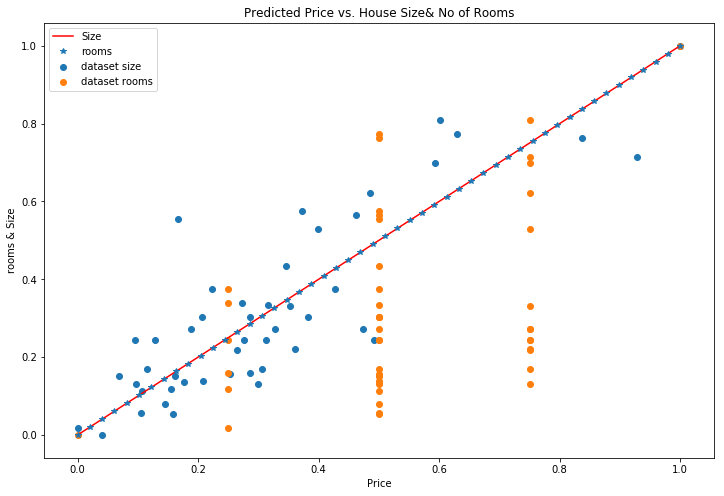

In [346]:
#Plotting Predicted Price vs. House Size& No of Rooms along with the original dataset(normalised)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, z, 'r', label='Size')
ax.plot(y, z,'*', label='rooms')
ax.scatter(df.df_size,df.df_price,label='dataset size')
ax.scatter(df.df_rooms,df.df_price,label='dataset rooms')
ax.legend(loc=2)
ax.set_ylabel('rooms & Size')
ax.set_xlabel('Price')
ax.set_title('Predicted Price vs. House Size& No of Rooms')

Text(0.5,1,'Error vs. Training Epoch')

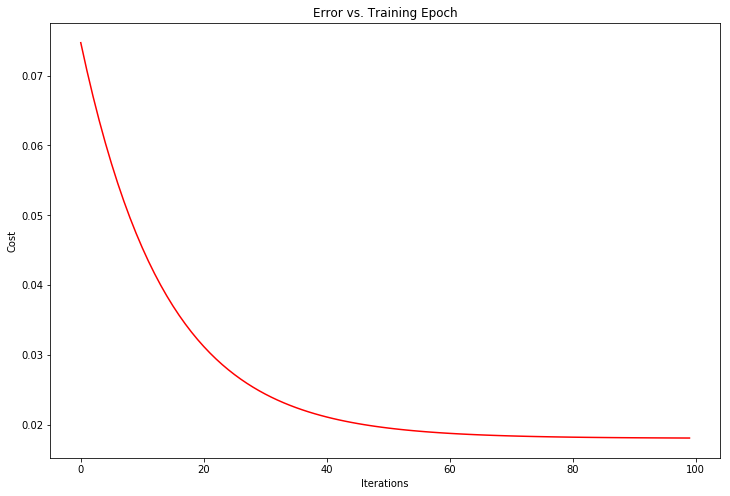

In [347]:
#Visualizing how error reduces as no of iteration increases
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')